# Homework 3

In [657]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## IRIS Data

### Data

In [6]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")

### Scatterplots

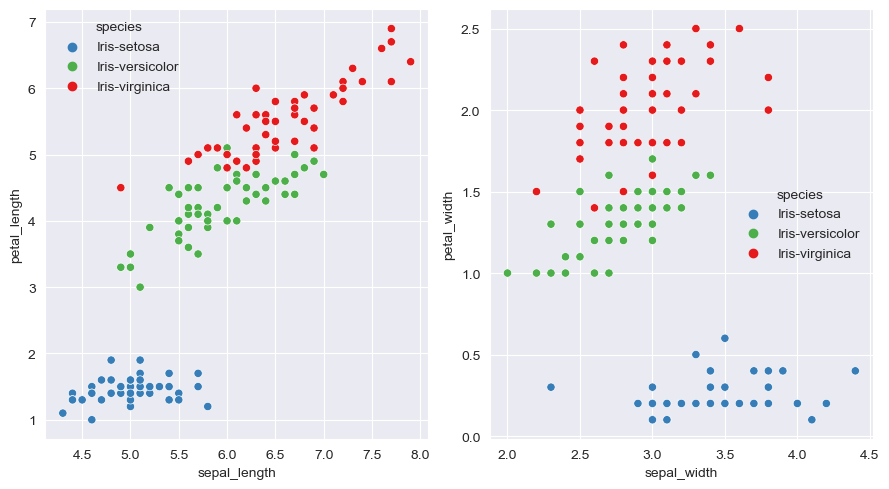

In [806]:
sns.set_style("darkgrid")
plt.figure(figsize=(9, 5))

# Making a palette similar to the one in the figures under IRIS data on the course github page
palette = sns.color_palette("Set1", len(iris_df["species"].unique()))

# Shift the colors to the left by slicing the palette
shifted_palette = palette[1:] + palette[:1]

plt.subplot(1, 2, 1) # (rows, columns, index)
sns.scatterplot(x=iris_df["sepal_length"], y=iris_df["petal_length"], data=iris_df, hue="species", palette=shifted_palette)
plt.legend(frameon=False, title="species") # Remove the border around the legend and add title

plt.subplot(1, 2, 2) # (rows, columns, index)
sns.scatterplot(x=iris_df["sepal_width"], y=iris_df["petal_width"], data=iris_df, hue="species", palette=shifted_palette)
plt.legend(frameon=False, title="species") # Remove the border around the legend and add title

plt.tight_layout()
plt.show()

From the plot on the left it looks like the variables `petal_length` and `sepal_length` in the species `Iris-versicolor` and `Iris-virginica` both have a positive correlation. The same can not be said about the plot on the right, where the `petal_width` and `sepal_width` in the species `Iris-versicolor` has a slight positive correlation but the species `Iris-virginica` has no sign of correlation between `petal_width` and `sepal_width`. We can also see that the species `Iris-setosa` has no sign of correlation in any of these two plots.  

### Boxplots

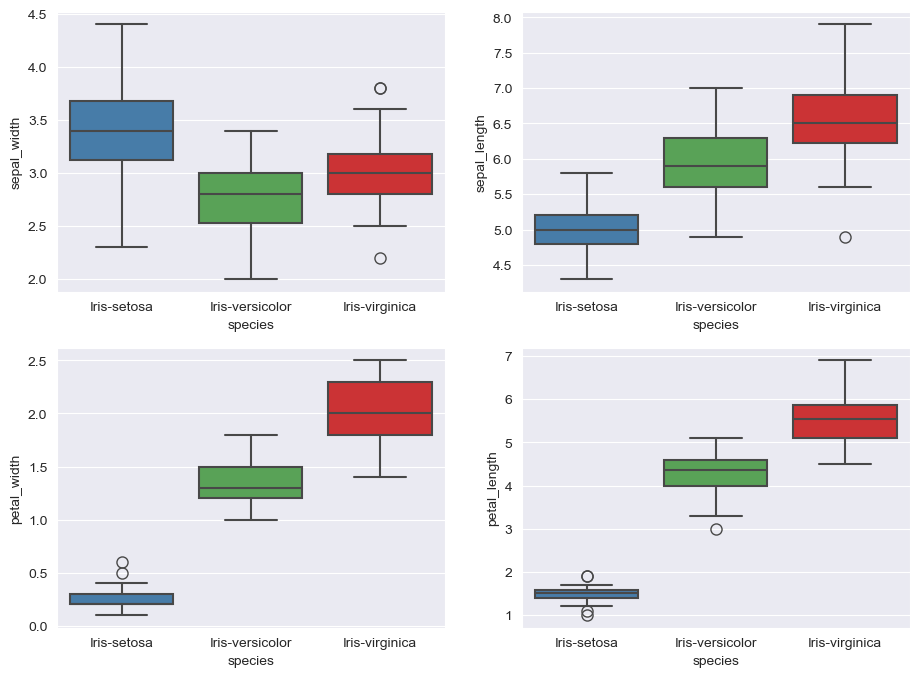

In [208]:
sns.set_style("darkgrid")
plt.figure(figsize=(11, 8))

plt.subplot(2, 2, 1) # (rows, columns, index)
sns.boxplot(x=iris_df["species"], 
            y=iris_df["sepal_width"],
            data=iris_df,
            hue="species",
            palette=shifted_palette,
            width=0.8,
            dodge=False, # Puts the boxes closer to each other
            flierprops=dict(marker='o', # Outlier shape
                            markersize=8, # Outlier size
                            fillstyle='none') # Outliers filled or not
           )
plt.legend().remove()

plt.subplot(2, 2, 2) # (rows, columns, index)
sns.boxplot(x=iris_df["species"], 
            y=iris_df["sepal_length"],
            data=iris_df,
            hue="species",
            palette=shifted_palette,
            width=0.8,
            dodge=False, # Puts the boxes closer to each other
            flierprops=dict(marker='o', # Outlier shape
                            markersize=8, # Outlier size
                            fillstyle='none') # Outliers filled or not
           )
plt.legend().remove()

plt.subplot(2, 2, 3) # (rows, columns, index)
sns.boxplot(x=iris_df["species"], 
            y=iris_df["petal_width"],
            data=iris_df,
            hue="species",
            palette=shifted_palette,
            width=0.8,
            dodge=False, # Puts the boxes closer to each other
            flierprops=dict(marker='o', # Outlier shape
                            markersize=8, # Outlier size
                            fillstyle='none') # Outliers filled or not
           )
plt.legend().remove()

plt.subplot(2, 2, 4) # (rows, columns, index)
sns.boxplot(x=iris_df["species"], 
            y=iris_df["petal_length"],
            data=iris_df,
            hue="species",
            palette=shifted_palette,
            width=0.8,
            dodge=False, # Puts the boxes closer to each other
            flierprops=dict(marker='o', # Outlier shape
                            markersize=8, # Outlier size
                            fillstyle='none') # Outliers filled or not
           )
plt.legend().remove()

plt.show()

From all of these plots except the top left one, we can see a clear upward trend. This is consistent with the plots from the previous task. From the top left plot we see that `sepal_width` for each of the species is roughly equal with a median between 2.75 and 3.5 whilst the `petal_width` is more spread out which we can see from the bottom left plot. Furthermore, we notice from the two plots on the right that each of the species has a tighter spread regarding their petal lengths compared to their sepal lengths. In conclusion, the distribution of the median for each of the species in the top left plot is the one thing that stands out in these four plots as well as the spread for each of the species in the bottom right plot compared to those in the top right plot.

### Pairplot

C:\Users\molin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


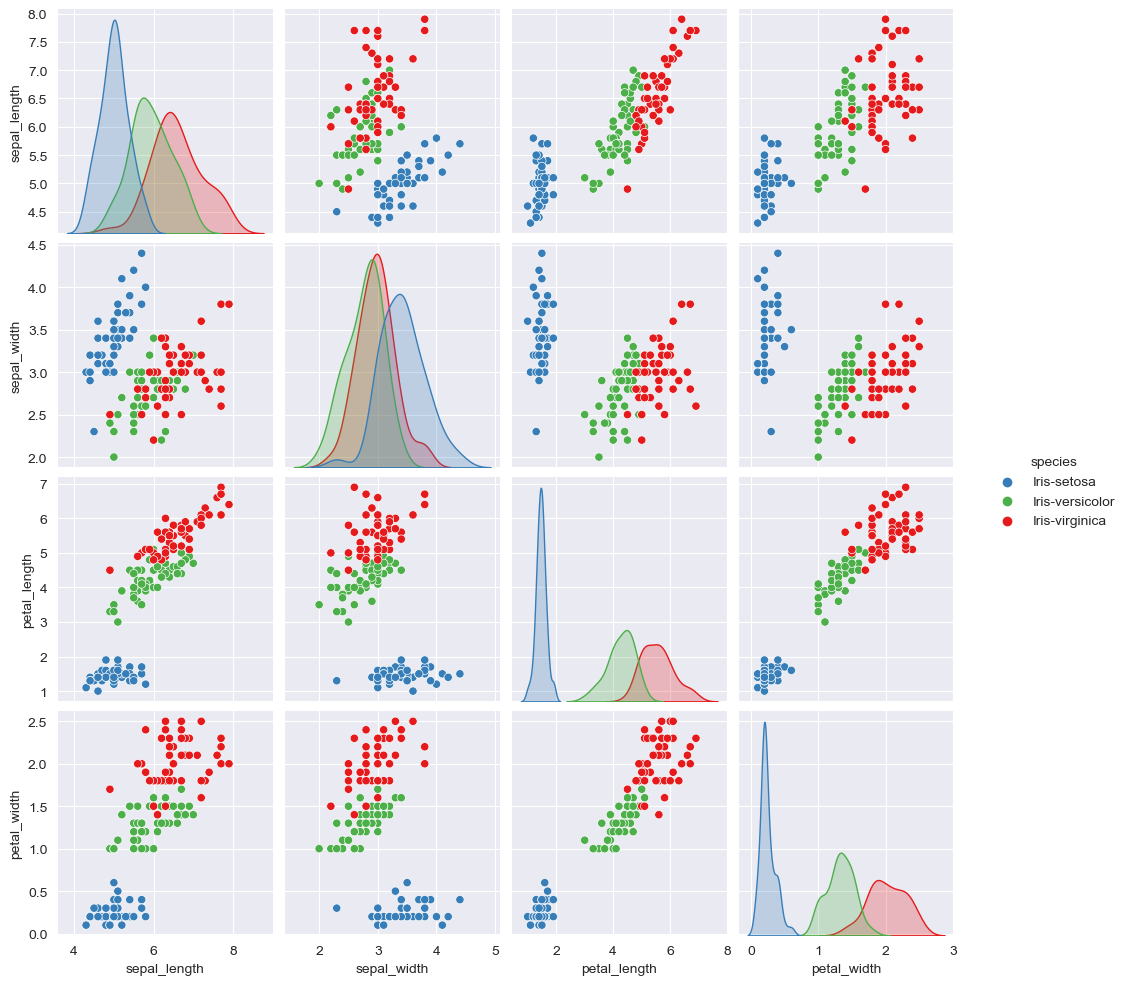

In [807]:
pair_plots = sns.pairplot(iris_df, 
                          vars=["sepal_length", "sepal_width", "petal_length", "petal_width"],
                          hue="species",
                          palette=shifted_palette,
                          diag_kind="kde") # KDE plots on the diagonal

pair_plots.fig.subplots_adjust(right=0.85)
plt.show()

From the plot in the fourth row third column and the plot in the third row fourth column we see that `petal_length` and `petal_width` are positively correlated with each other if we dissregard the different species. However, when we consider the different species, then the variables are only somewhat positively correlated regarding the species `Iris-versicolor`. From the plot in the second row first column and the plot in the first row second column we see that `sepal_length` and `sepal_width` show no sign of being correlated. We can also notice that the species `Iris-versicolor` and `Iris-virginica` have a significant overlap. Furthermore, if we look at the KDE plots on the diagonal which shows us the density distributions for each of the species, we see that the petal dimensions `petal_length` and `petal_width` are significantly more spread out between each of the species than the sepal dimensions `sepal_length` and `sepal_width`. Lastly we notice that the species `Iris-setosa` never overlaps with any of the other two species, which could mean that it is from a different family of species. 

## Birdwatching

### Data

In [769]:
bird_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")
bird_df_copy = bird_df.copy()

### What are the most prevalent species?

We need to sum up the number of birds sighted for each species and to do this we need to group all the sightings by species and then sum up all the corresponding values in the column `Antal` for each of the sightings. 

In [787]:
# Convert 'Antal' column to numeric and setting non-numeric values to NaN
bird_df['Antal'] = pd.to_numeric(bird_df['Antal'], errors='coerce')

# Drop rows where 'Antal' is NaN
bird_df = bird_df.dropna(subset=['Antal'])

# Group by species and sum the number of birds sighted
most_prevalent_species = bird_df.groupby('Artnamn')['Antal'].sum()

# Sort the result in descending order to get the most prevalent species
most_prevalent_species = most_prevalent_species.sort_values(ascending=False)

most_prevalent_species_df = pd.DataFrame(most_prevalent_species)

# Display the most prevalent species
most_prevalent_species_df

,Antal
Artnamn,
Grönsiska,20211.0
Sothöna,8308.0
Gräsand,7167.0
Storskrake,6750.0
Vitkindad gås,6345.0
...,...
Fjällvråk,1.0
Ejder,1.0
Spillkråka,1.0


From this print-out we see that the top 3 most prevalent species is `Grönsiska`, `Sothöna` and `Gräsand`. We need to consider however that some sightings had extremely high values in the `Antal` column which absolutely could change the top 3 to something completely different. Below I have used the function `unique()` on a copy of our dataframe `bird_df` which shows us that some observers observed several hundreds and even thousands of birds at a time. The value `10000` does indeed correspond to a sighting from a group of the species `Grönsiska` (since it is the only species with a count of over 10,000). The other values in the thousands could more than likely be from the top 5 species. With this in mind, we should redo this experiment without the sightings that are in the thousands to have a more fair comparison. I will however not do this because of time restraints. It is also worth noting the non-numerical values `noterad` and `Ej återfunnen` which also could change the top 3 if those strings corresponded to really large numbers. 

In [770]:
bird_df_copy["Antal"].unique()

array(['2', '1', '10', '5', '6', '3', '7', '30', '8', '4', 'noterad',
       '100', '16', '222', '60', '18', '50', '12', '25', '20', '21',
       '600', '51', '80', '250', '200', '15', '11', '70', '71', '35',
       '3000', '67', '9', '26', '150', '40', '17', '14', '28', '1000',
       'Ej återfunnen', '13', '63', '22', '120', '138', '1100', '19',
       '42', '47', '23', '96', '85', '10000', '400', '45', '130', '82',
       '68', '34', '109', '122', '39', '41', '57', '49', '116', '125',
       '75', '81', '55', '43', '86', '156', '27', '235', '46', '115',
       '65', '110', '140', '141', '32', '123', '66', '145', '203', '168',
       '61', '24', '83', '119', '74', '38', '192', '88', '53', '33', '97',
       '52', '56', '44', '36', '37', '31', '185', '172', '108', '90',
       '300', '175', '95', '162', '54', '29', '270', '48', '225', '89',
       '155', '133', '72', '190', '124', '62', '107', '248', '408', '570'],
      dtype=object)

### What is the monthly distribution of the top 3 most prevalent species?

Firstly we use `to_datetime` from the library `pandas` to change the column `Startdatum` into a format that is easy to work with. Then we make a new column `Month` in our dataframe which stores the month for each sighting. We use `dt.month` for this.

In [771]:
bird_df["Startdatum"] = pd.to_datetime(bird_df["Startdatum"])
bird_df["Month"] = bird_df["Startdatum"].dt.month

Next we create a new dataframe `species_per_month_df` which shows how many of each species were sighted each month. Since we only care about the top 3 most prevelant species which is `Grönsiska`, `Sothöna` and `Gräsand` we create a new filtered dataframe `filtered_df`.

In [784]:
species_per_month_df = bird_df.groupby(["Month", "Artnamn"]).size().reset_index(name="Count")
filtered_df = species_per_month_df[species_per_month_df["Artnamn"].isin(["Grönsiska", "Sothöna", "Gräsand"])]

Before we make the plot, we need to check from which months we have sightings since this information will be used for the labels on the x-axis in the future plot. We use the function `unique()` on `filtered_df["Month"]`.

In [785]:
print(filtered_df["Month"].unique())

[1 2 3 4 5 6]


We see that we have sightings from the first six months and we can finally plot the monthly distribution of the top 3 most prevelant species using a grouped bar chart.

**NOTE THAT THIS PLOT IS WRONG SINCE IT DOESN'T ACCOUNT FOR THE `ANTAL` COLUMN. I NOTICED IT TOO LATE BUT I WILL STILL INCLUDE IT SINCE IT MIGHT SHOW SOMETHING USEFUL**

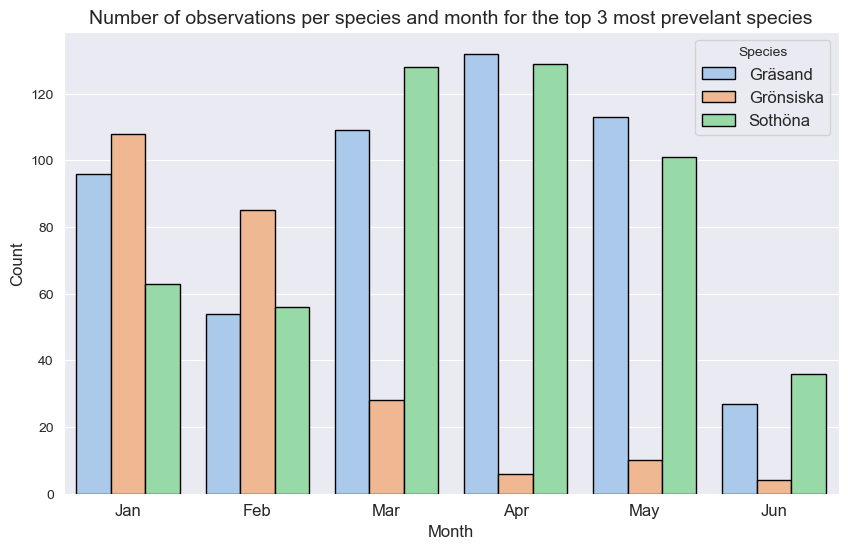

In [775]:
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x="Month", y="Count", hue="Artnamn", palette="pastel", edgecolor="black")

plt.title("Number of observations per species and month for the top 3 most prevelant species", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.xticks(ticks=range(6), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun"], fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Species", fontsize=12)

plt.show()

### What are the rarest species?

By using `sort_values(by='Antal', ascending=True)` on `most_prevalent_species_df` we can sort the dataframe so it shows the species with the fewest sightings at the top. If we then use `head()` with an appropriate parameter we can see which are the rarest species. If we use `head(25)` we see that the last six species have two sightings while the rest has one. 

In [802]:
most_prevalent_species_df.sort_values(by='Antal', ascending=True).head(25)

,Antal
Artnamn,
"Ormvråk, underarten buteo",1.0
Ägretthäger,1.0
Lappsparv,1.0
Vinterhämpling,1.0
Varfågel,1.0
Bivråk,1.0
Bändelkorsnäbb,1.0
Trädlärka,1.0
Strömstare,1.0


We therefore conclude that the species with only one sighting are the rarest species and add them to a new dataframe `rarest_species_df`. 

In [803]:
rarest_species_df = most_prevalent_species_df[most_prevalent_species_df["Antal"] == 1]
rarest_species_df

,Antal
Artnamn,
Ägretthäger,1.0
Lappsparv,1.0
Vinterhämpling,1.0
Varfågel,1.0
Bivråk,1.0
Bändelkorsnäbb,1.0
Trädlärka,1.0
Strömstare,1.0
Gravand,1.0


### During which month did the most birds migrate and in which direction?

First we create a new dataframe `activity_per_month_df` in which we store information about the amount of birds that were doing a specific activity during each month. Then we use this dataframe to create another dataframe `migrating_df` which shows us the amount of birds that were migrating each month and in which direction.

In [338]:
activity_per_month_df = bird_df.groupby(["Month", "Aktivitet"]).size().reset_index(name="Count")
migrating_df = activity_per_month_df[activity_per_month_df["Aktivitet"].isin(["sträckande NO", "sträckande N", "sträckande NV", "sträckande O", "sträckande V", "sträckande", "sträckande S", "sträckande SV"])]

Before we make a plot, we need to check from which months the birds migrated atleast once since this information will be used for the labels on the x-axis in the future plot. We use the function `unique()` on `migrating_df["Month"]`.

In [339]:
print(migrating_df["Month"].unique())

[2 3 4 5]


We see that we have atleast one observation of a bird migrating from the months February, Mars, April and May and we can plot a grouped bar chart on the amount of birds migrating in each of these months and in which direction they migrated.

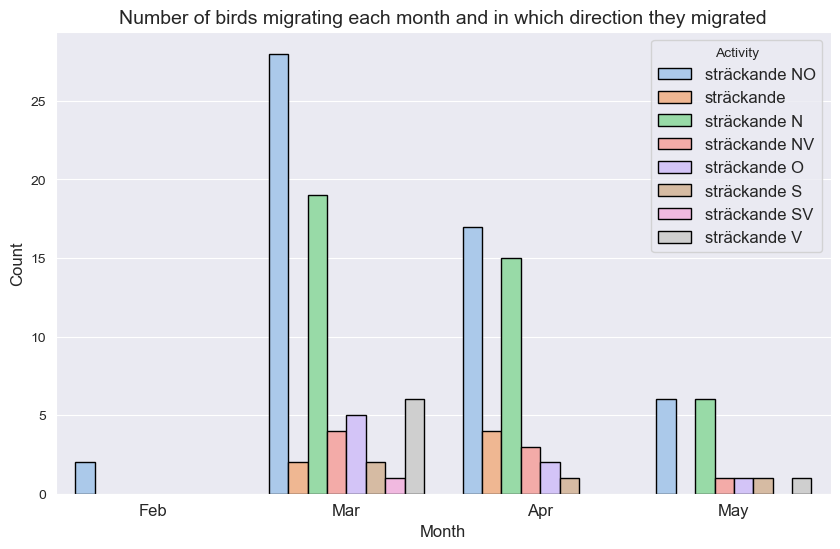

In [340]:
plt.figure(figsize=(10, 6))
sns.barplot(data=migrating_df, x="Month", y="Count", hue="Aktivitet", palette="pastel", edgecolor="black")

plt.title("Number of birds migrating each month and in which direction they migrated", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.xticks(ticks=range(4), labels=["Feb", "Mar", "Apr", "May"], fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Activity", fontsize=12, loc="upper right")

plt.show()

From this plot we see that most birds migrated in Mars and that the majority of them migrated north and north east, this is not totally uncommon since birds that nest further north tend to migrate northward in the spring because there is an abundance of nesting locations and an increase to insect populations*. We can also notice that the amount of birds migrating each month decreases as we get closer to the summer. This seems reasonable considering that most birds who do migrate, migrate to warmer parts of the world during winter time, so they wouldn't need to migrate when summer comes around. One last thing we can notice is the outlier during February which is most likely due to there being almost no sightings during this month. 

*: https://www.allaboutbirds.org/news/the-basics-how-why-and-where-of-bird-migration/

### During which time of the year were the most broodings observed?

We create a dataframe `brooding_df` containing information about the amount of broodings ocurring every month. For this we use `activity_per_month_df` from the previous task. We then display this dataframe.

In [341]:
brooding_df = activity_per_month_df[activity_per_month_df["Aktivitet"].isin(["ruvande"])]
brooding_df

,Month,Aktivitet,Count
63,4,ruvande,32
90,5,ruvande,133
116,6,ruvande,26


From this print-out we see that broodings only ocurred during the spring or more specifically the months April (4), May (5) and June (6) and that the majority of them ocurred during May. This seems reasonable because it is during the period when the number of migrating birds decreases (see plot from task above) and they are more likely to settle down and begin laying eggs.

### What is the distribution of age when it comes to searching for food?

We start by creating a dataframe `searching_for_food_df` which contains all the rows in `bird_df` with `Aktivitet` equal to `födosökande`. Then we create `age_grouped_df` which contains information about how many birds of each age group were searching for food.

In [329]:
searching_for_food_df = bird_df[bird_df["Aktivitet"] == "födosökande"]
age_grouped_df = searching_for_food_df.groupby(["Ålder/stadium"]).size().reset_index(name="Count")

We can now plot this information using a barplot which shows us the distribution of age when it comes to searching for food.

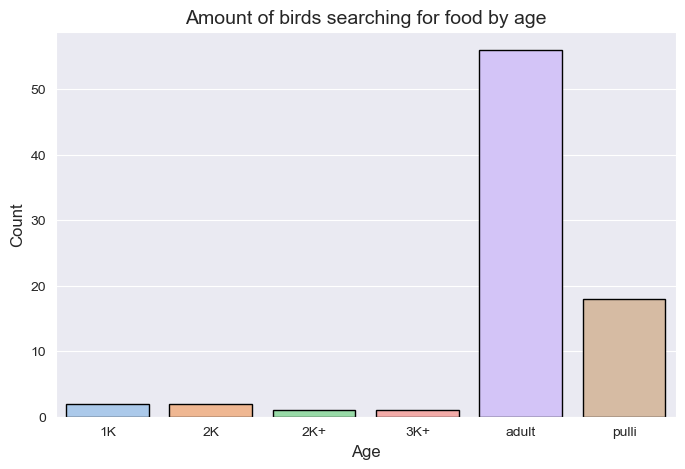

In [330]:
plt.figure(figsize=(8, 5))
sns.barplot(data=age_grouped_df, x="Ålder/stadium", y="Count", palette="pastel", edgecolor="black")

plt.title("Amount of birds searching for food by age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

We see from the plot that the groups `adult` and `pulli` (the earliest stage of a birds growth) are by far the majority when it comes to searching for food. It seems obvious that adults are the largest group but the fact that `pulli` is the second largest might seem a bit strange. However, these birds could come from a species that might leave their children at a young age, which could explain this statistic. The age groups `1K`, `2K`, `2K+` and `3K+` are explained as follows**:

1K: A bird born certainly this calendar year \
2K: A bird born certainly previous calendar year \
2K+: A bird born certainly previous calendar year, exact year unknown \
3K+: A bird born certainly the year before previous calendar year, exact year unknown

**: https://ondrejkauzal.org/gallery/agecodes.html

## Predicting Strokes

### Data

In [735]:
stroke_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

### Does smoking increase the chance of having a stroke?

We first create a dataframe `smoke_status_proportions_df` which shows us the proportion of people having a stroke in each of the `smoking_status` categories; `Unknown`, `formerly smoked`, `never smoked` and `smokes`. 

In [396]:
smoke_status_proportions_df = (
    stroke_df.groupby(["smoking_status"])["stroke"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

We then plot this information using a barplot to better visualize it.

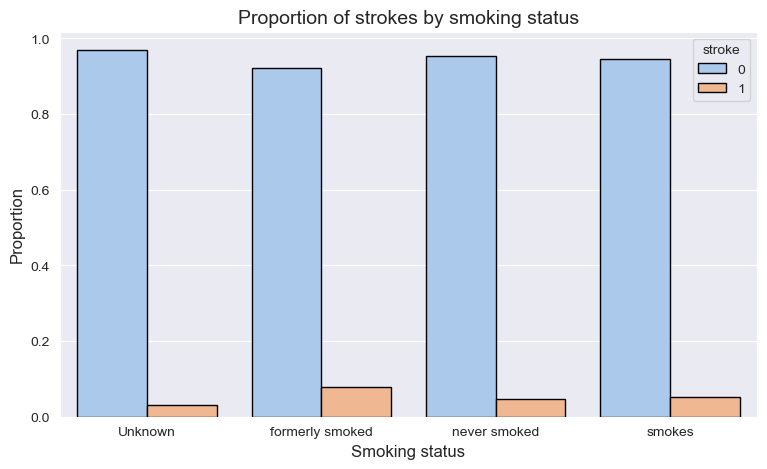

In [804]:
plt.figure(figsize=(9, 5))
sns.barplot(data=smoke_status_proportions_df, x="smoking_status", y="proportion", hue="stroke", palette="pastel", edgecolor="black")

plt.title("Proportion of strokes by smoking status", fontsize=14)
plt.xlabel("Smoking status", fontsize=12)
plt.ylabel("Proportion", fontsize=12)

plt.show()

From this plot we see that people who formerly smoked had the highest proportion of people getting a stroke followed by people who currently smokes and then people who have never smoked and then lastly the category `Unknown`. It is however difficult to come to a concrete conclusion since the proportions are quite similar and the category `Unknown` could also change these proportions into something rather different. Therefore, we can not conclude that smoking increases the chance of having a stroke.

### Does your environment affect your chances of having a stroke?

In this task I am planning on seeing if the variables `work_type` and `Residence_type` have anything to do with the variable `stroke`. We start by creating two dataframes `work_type_proportions_df` which shows us the proportion of people having a stroke in each of the `work_type` categories; `Govt_job`, `Never_worked`, `Private`, `Self-employed` and `children` and `residence_type_proportions_df` which shows us the proportion of people having a stroke in each of the `residence_type` categories; `Rural` and `Urban`. 

In [417]:
work_type_proportions_df = (
    stroke_df.groupby(["work_type"])["stroke"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

residence_type_proportions_df = (
    stroke_df.groupby(["Residence_type"])["stroke"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

We can then plot this information using two barplots.

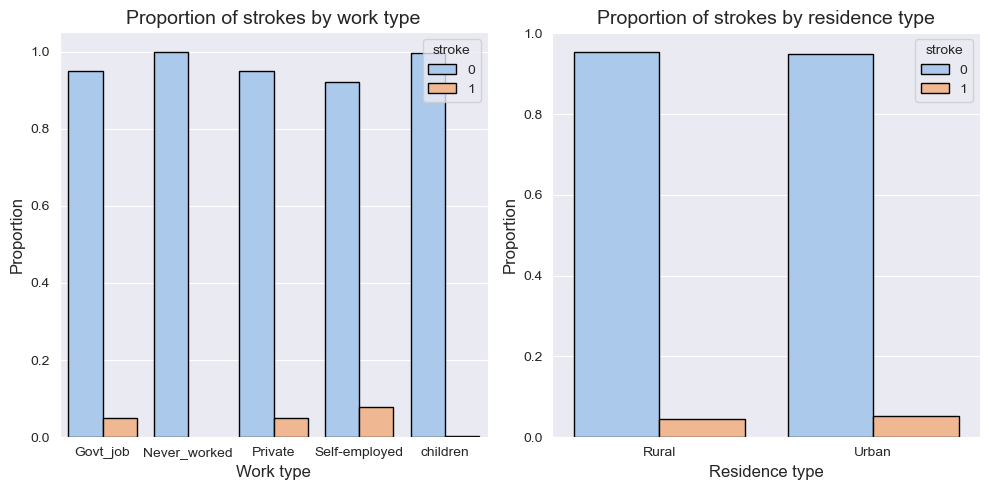

In [805]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) # (rows, columns, index)
sns.barplot(data=work_type_proportions_df, x="work_type", y="proportion", hue="stroke", palette="pastel", edgecolor="black")

plt.title("Proportion of strokes by work type", fontsize=14)
plt.xlabel("Work type", fontsize=12)
plt.ylabel("Proportion", fontsize=12)

plt.subplot(1, 2, 2) # (rows, columns, index)
sns.barplot(data=residence_type_proportions_df, x="Residence_type", y="proportion", hue="stroke", palette="pastel", edgecolor="black")

plt.title("Proportion of strokes by residence type", fontsize=14)
plt.xlabel("Residence type", fontsize=12)
plt.ylabel("Proportion", fontsize=12)

plt.tight_layout()
plt.show()

From the plot on the left we see that those who were self employed had the highest proportion of people getting a stroke with those working a government job and a private job close behind. Children had a very small proportion of people getting a stroke and those who have never worked did not have a single case of stroke due to them being so few in that group (see print-out below). From the plot on the right we see that both `Rural` and `Urban` have a really similar proportion of people getting a stroke. From both of these plots we therefore draw the conclusion that you have a slightly higher chance of getting a stroke if you are self-employed but not by much and that your residence type does not affect your chance of getting a stroke. It is worth noting that since we have such few people in the category `Never_worked` we could come to a different conclusion if we had more people in that category, i.e. a bigger sample size of participants.

In [419]:
work_type_df = (
    stroke_df.groupby(["work_type"])["stroke"]
    .value_counts(normalize=False)
    .rename("count")
    .reset_index()
)

work_type_df

,work_type,stroke,count
0,Govt_job,0,624
1,Govt_job,1,33
2,Never_worked,0,22
3,Private,0,2776
4,Private,1,149
5,Self-employed,0,754
6,Self-employed,1,65
7,children,0,685
8,children,1,2


### How does a person's size affect the chances of them having a stroke?

For this task I am going to investigate if the variable `bmi` affects a person's chances of having a stroke. We can simply create a boxplot with the variable `stroke` on the x-axis and `bmi` on the y-axis.

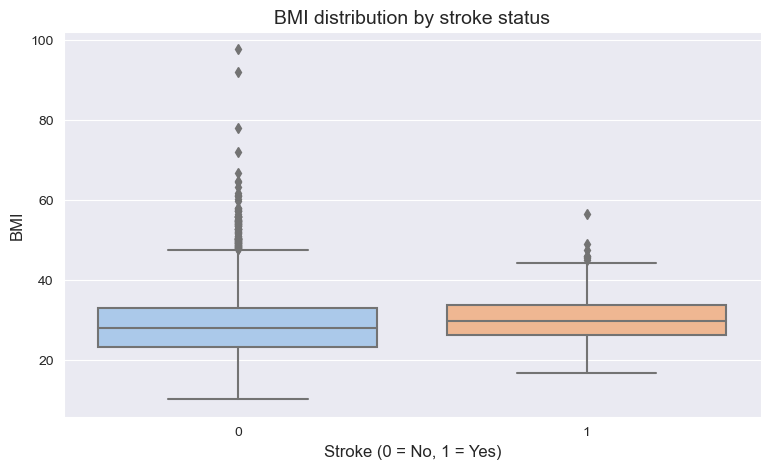

In [434]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=stroke_df, x="stroke", y="bmi", palette="pastel")
plt.title("BMI distribution by stroke status", fontsize=14)
plt.xlabel("Stroke (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("BMI", fontsize=12)

plt.show()

From this plot we see that people that have had a stroke, have a slightly higher median compared to those who haven't had a stroke. We can also notice that the spread regarding those that have had a stroke is slightly narrower compared to those who haven't had a stroke as well as that there is many more outliers in the latter case. This could be because we have fewer people who've had a stroke in the dataset and that a bigger sample size of people could even it out. From the print-out below we see that only about 5% of all the people in the dataset have had a stroke so this conclusion is valid. To answer our question, it seems as though the people with really high bmi's and the people with really low bmi's are more likely to not have a stroke and everyone inbetween are equally as likely to get a stroke or not. This seems counter intuitive considering the health risks with having a really high or really low bmi and with a bigger sample size of people this would most likely not be the case. Although I am not a health professional and my reasoning might not be correct.

In [432]:
stroke_df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

## Cleaning data

### Data

In [707]:
cellphones_df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")

We start with converting all the relevant cells (cells ending with `k`, `M` or `B`) to numbers. For this we use the function `convert_to_number`.

In [701]:
def convert_to_number(s):
    if isinstance(s, str):  # Check if the input is a string            
        if 'k' in s:
            return float(s.replace('k', '')) * 1000
        elif 'M' in s:
            return float(s.replace('M', '')) * 1000000
        elif 'B' in s:
            return float(s.replace('B', '')) * 1000000000
        else:
            return float(s)
    elif isinstance(s, (int, float)):  # If it's already numeric, return as is
        return s
    else:  # Handle unexpected types (e.g., None)
        return None

We then apply this function to each column in our dataframe except the column containing the countries (`iso-3`).

In [731]:
for column in cellphones_df.columns:
    if column != "iso-3":
        cellphones_df[column] = cellphones_df[column].apply(convert_to_number)

Our next step is to deal with missing values. I decided to replace all the `NaN` on each row with `0` if it was to the left of any value greater than zero. For example if we have a row with the cells: `NaN`, `NaN`, `NaN`, `20`, `NaN` I replaced all the `NaN` to the left of the `20` with zeros. I did this because it is likely that the `NaN` to the left of the first value greater than zero, would have been zeros aswell. The for-loop below executes what I have just gone over.

In [732]:
# Iterate over each row
for index, row in cellphones_df.iterrows():
    for col in range(len(row)):
        if pd.isna(row[col]):  # Check if the value is NaN
            cellphones_df.iloc[index, col] = 0  # Replace NaN with 0
        elif isinstance(row[col], str):  # Continue if the cell contains a string
            continue
        elif row[col] == 0:  # Continue if the value is 0
            continue
        elif row[col] > 0:  # Stop if the value is greater than 0
            break

For the rest of the `NaN` (i.e. to the right of any value greater than zero) I decided to replace them with the mean of the three values to the left of it (I did only include values greater than zero since otherwise, this mean would always be lower than the value to the left of it). If there were fewer than three positive values to the left of the `NaN`, I took the mean of all the values to the left. For example if we have a row with the cells: `0`, `0`, `10`, `20`, `NaN` then we would replace the `NaN` with the mean of `10` and `20`. If we instead have a row: `5`, `10`, `30`, `40`, `NaN` then we would replace `NaN` with the mean of the values `10`, `30` and `40`. I used the function `replace_nan_with_mean` below for this.

In [734]:
def replace_nan_with_mean(row):
    for col in range(len(row)):
        if pd.isna(row[col]):  # Check if the value is NaN
            # Find the non-NaN positive values to the left of the current NaN
            left_values = row[:col].dropna()  # Get all non-NaN values to the left
            
            # Convert left_values to numeric (ignore non-numeric values)
            left_values = pd.to_numeric(left_values, errors='coerce')
            
            positive_values = left_values[left_values > 0]  # Filter for values > 0
            
            if len(positive_values) > 0:
                # If there are positive values, compute the mean of the last 3
                if len(positive_values) >= 3:
                    mean_val = positive_values[-3:].mean()
                else:
                    # If less than 3 positive values, compute the mean of all positive values to the left
                    mean_val = positive_values.mean()
                row[col] = mean_val  # Replace NaN with the computed mean
    return row

# Apply the function to each row
cellphones_df = cellphones_df.apply(replace_nan_with_mean, axis=1)

# Display the dataframe
cellphones_df

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,127000.0,135000.0,139000.0,140000.0,141000.0,140000.0,1.403333e+05,1.404444e+05,1.402593e+05
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,2.390000e+07,2.200000e+07,2.260000e+07
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,1.330000e+07,1.330000e+07,1.480000e+07
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3.630000e+06,2.710000e+06,2.630000e+06
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,8.030000e+04,8.260000e+04,8.790000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,5.620000e+05,5.620000e+05,5.620000e+05
210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11100000.0,11700000.0,13900000.0,16800000.0,17100000.0,15000000.0,16400000.0,1.540000e+07,1.530000e+07,1.570000e+07
211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50400000.0,64000000.0,68400000.0,76900000.0,79300000.0,88000000.0,82400000.0,8.850000e+07,9.240000e+07,9.700000e+07
212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5450000.0,8160000.0,10500000.0,10400000.0,10100000.0,11600000.0,12000000.0,1.340000e+07,1.550000e+07,1.720000e+07


To create the dataframe for the last part of this task, I used the function `isin()` to create the dataframe `cellphones_filtered_df` which contained only the rows from the countries `CHN`, `IND`, `USA`, `IDN`, `BRA` from the original dataframe `cellphones_df`. I then only displayed the columns which were necessary for the task.

In [729]:
cellphones_filtered_df = cellphones_df[cellphones_df['iso-3'].isin(['CHN', 'IND', 'USA', 'IDN', 'BRA'])]
cellphones_filtered_df[['iso-3', '2015', '2016', '2017', '2018', '2019']]

,iso-3,2015,2016,2017,2018,2019
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.230000e+08
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.060000e+08
